### Import libraries

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


### Load data from slearn datasets

In [2]:
dataset = load_iris(return_X_y=False)

In [3]:
# print(dataset.feature_names)
# print(dataset.DESCR)

In [4]:
X, Y = load_iris(as_frame=True, return_X_y=True)
print("Features:")
print(X.head())
print("Labels:")
print(Y.head())
print("Label count: ")
print(Y.value_counts())


Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Labels:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32
Label count: 
0    50
1    50
2    50
Name: target, dtype: int64


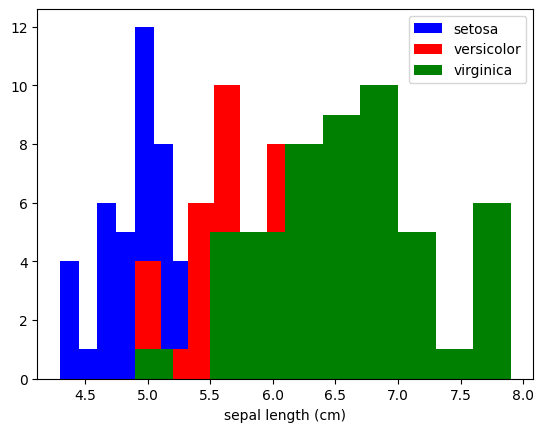

In [5]:
vis_fig, vis_ax = plt.subplots()
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(dataset.target_names)), colors):
    vis_ax.hist(dataset.data[dataset.target == label, 0],
            label=dataset.target_names[label],
            color=color)
vis_ax.set_xlabel(dataset.feature_names[0])
vis_ax.legend(loc='upper right')
plt.show()

In [6]:
vis_fig, vis_ax = plt.subplots()
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(dataset.target_names)), colors):
    vis_ax.hist(dataset.data[dataset.target == label, 1],
                label=dataset.target_names[label],
                color=color)
vis_ax.set_xlabel(dataset.feature_names[1])
vis_ax.legend(loc='upper right')
plt.show()

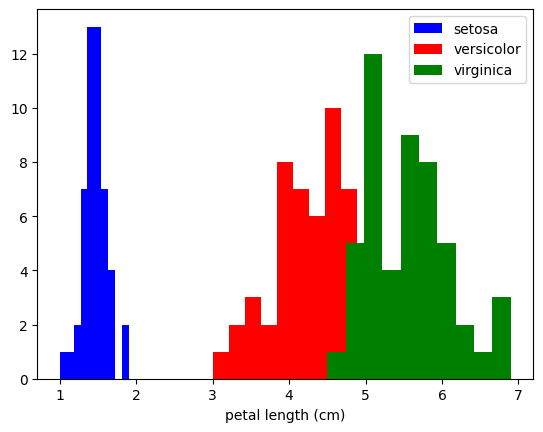

In [7]:
vis_fig, vis_ax = plt.subplots()
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(dataset.target_names)), colors):
    vis_ax.hist(dataset.data[dataset.target == label, 2],
                label=dataset.target_names[label],
                color=color)
vis_ax.set_xlabel(dataset.feature_names[2])
vis_ax.legend(loc='upper right')
plt.show()

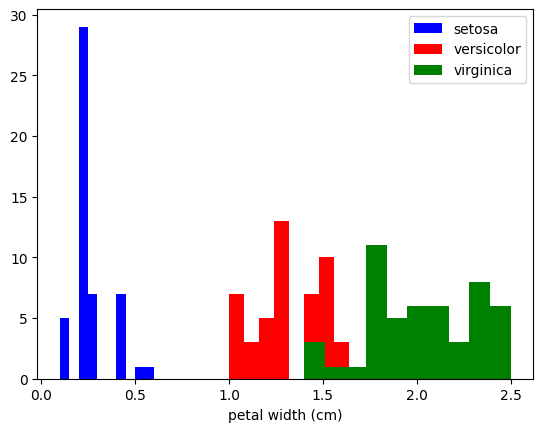

In [8]:
vis_fig, vis_ax = plt.subplots()
colors = ['blue', 'red', 'green']
for label, color in zip(range(len(dataset.target_names)), colors):
    vis_ax.hist(dataset.data[dataset.target == label, 3],
                label=dataset.target_names[label],
                color=color)
vis_ax.set_xlabel(dataset.feature_names[3])
vis_ax.legend(loc='upper right')
plt.show()

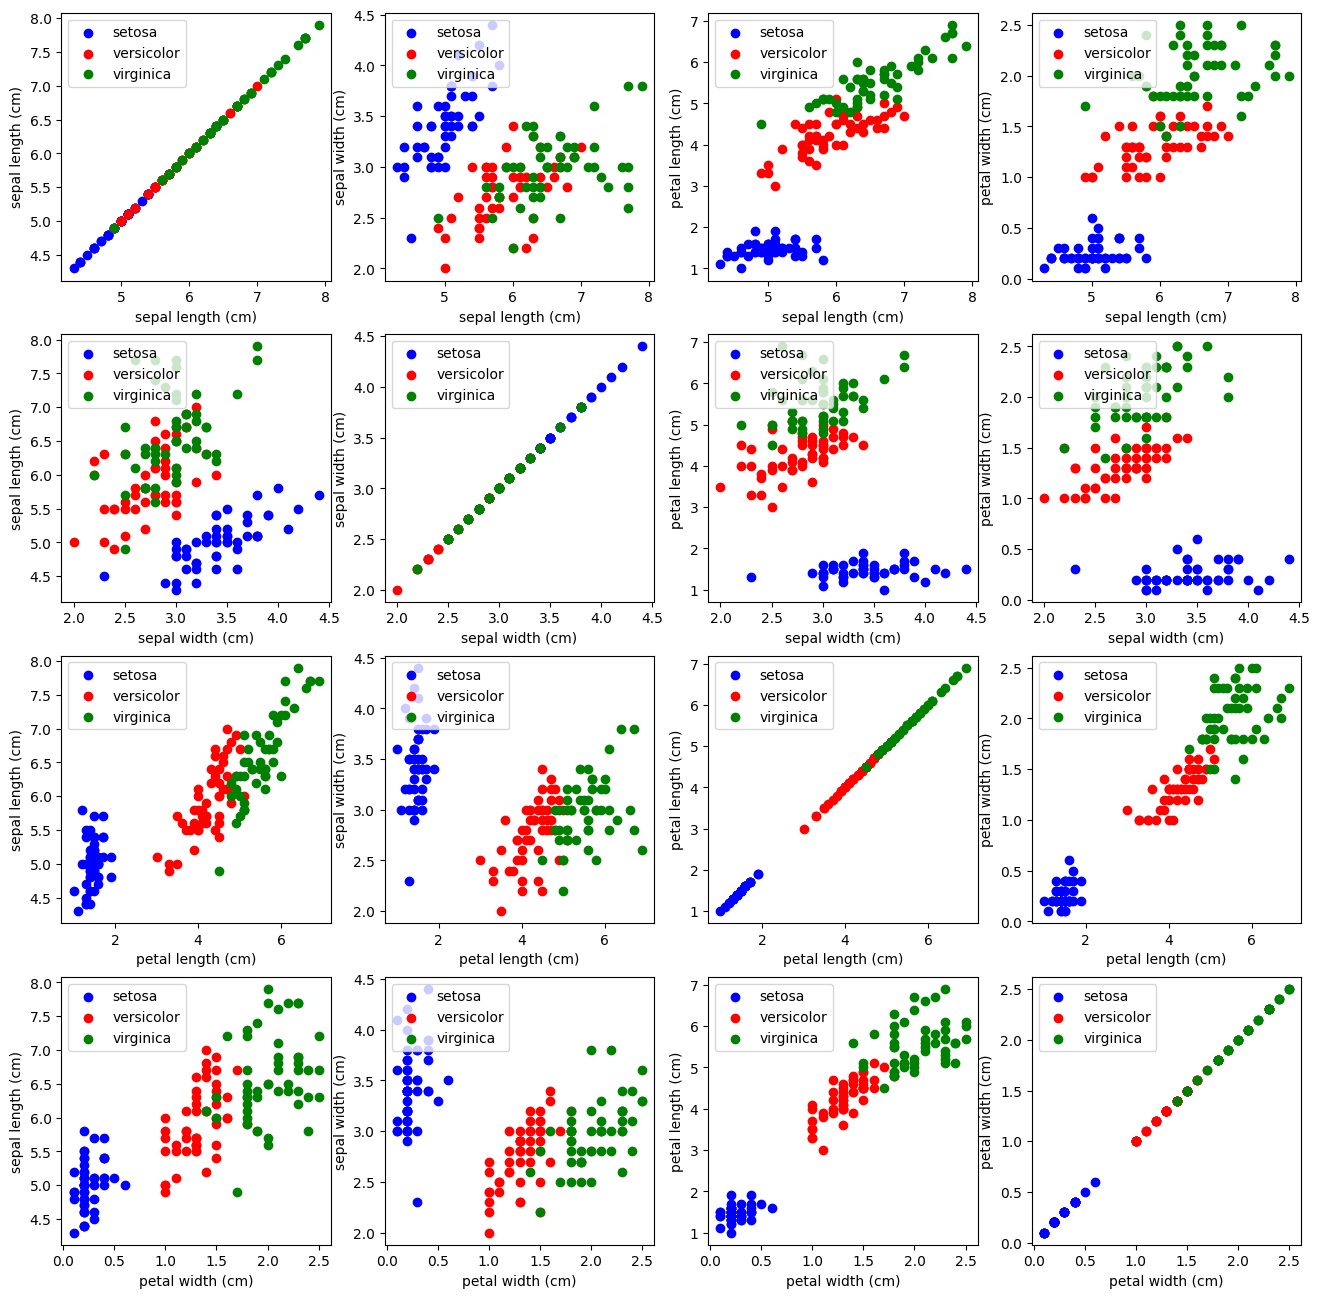

In [9]:
n = len(dataset.feature_names)
vis2_fig, vis2_ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['blue', 'red', 'green']

for x in range(n):
    for y in range(n):
        xname = dataset.feature_names[x]
        yname = dataset.feature_names[y]
        for color_ind in range(len(dataset.target_names)):
            vis2_ax[x, y].scatter(dataset.data[dataset.target == color_ind, x],
                             dataset.data[dataset.target == color_ind, y],
                             label=dataset.target_names[color_ind],
                             c=colors[color_ind])
        vis2_ax[x, y].set_xlabel(xname)
        vis2_ax[x, y].set_ylabel(yname)
        vis2_ax[x, y].legend(loc='upper left')
plt.show()


### Calculate covariance and correlation

In [10]:
def covariance(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return ((np.sum((x - x_mean) * (y - y_mean))) / (len(X) - 1))

In [11]:
def correlation(x, y):
    std_x = covariance(x, x)
    std_y = covariance(y, y)
    return covariance(x, y) / np.sqrt(std_x * std_y)


In [12]:
corr = {}


In [13]:
for i in range(len(X.columns)):
    cur = []
    for j in range(len(X.columns)):
        cur.append(correlation(X.iloc[:, i], X.iloc[:, j]))
    cur.append(correlation(X.iloc[:, i], Y))
    corr[X.columns[i]] = cur
cur = []
for i in range(len(X.columns)):
    cur.append(correlation(X.iloc[:, i], Y))
cur.append(correlation(Y, Y))
corr['Y'] = cur
corr = pd.DataFrame(corr, columns=corr.keys(), index=corr.keys())
# print(corr)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths=1,
            linecolor='white', fmt='.3f', ax=ax)
plt.show()


In [14]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['Y'] = dataset.target
df_fig, df_ax = plt.subplots(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='rainbow', linewidths=1,
            linecolor='white', fmt='.3f', ax=df_ax)
plt.show()


### Split data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, shuffle=True)


### Train model

In [16]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, Y_train)
KNN_predcit = KNN_model.predict(X_test)


### Predict

In [17]:
KNN_predict_check = pd.DataFrame({'Actual': Y_test, 'Predicted': KNN_predcit})
print(KNN_predict_check.head())


     Actual  Predicted
14        0          0
98        1          1
75        1          1
16        0          0
131       2          2


### Calculate confusion mattrix

In [18]:
cm = [[0, 0, 0],
      [0, 0, 0],
      [0, 0, 0]]
labels = ['Iris-Setosa_0', 'Iris-Versicolour_1', 'Iris-Virginica_2']
for index, row in KNN_predict_check.iterrows():
    one, two = row['Actual'], row['Predicted']
    cm[one][two] += 1
cm = pd.DataFrame(cm, index=labels, columns=labels)
# print(cm)
KNN_fig, KNN_ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='rainbow', linewidths=1,
            linecolor='white', ax=KNN_ax)
plt.show()


### Caculate metrics

In [19]:
def accuracy(KNN_set): 
    tp = 0
    for index, row in KNN_set.iterrows():
        one, two = row['Actual'], row['Predicted']
        if one == two: 
            tp += 1
    return tp / len(KNN_set)

In [20]:
print(accuracy(KNN_predict_check))
# 0.9777777777777777
print(accuracy_score(Y_test, KNN_predcit))
# 0.9777777777777777

0.9777777777777777
0.9777777777777777


### Drop feature and re-train

In [21]:
X_drop = pd.DataFrame(X, columns=X.columns)

for i in range(len(X.columns)):
    if abs(corr[X.columns[i]][len(X.columns) - 1]) < 0.5:
        X_drop.drop(X.columns[i], axis=1, inplace=True)
# print(X_drop)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_drop, Y, test_size=0.3, random_state=1, shuffle=True)
KNN_drop_model = KNeighborsClassifier()
KNN_drop_model.fit(X_train, Y_train)
KNN_drop_predcit = KNN_drop_model.predict(X_test)
KNN_drop_predict_check = pd.DataFrame({'Actual': Y_test, 'Predicted': KNN_drop_predcit})
print(KNN_drop_predict_check.head())
cm = [[0, 0, 0],
      [0, 0, 0],
      [0, 0, 0]]
labels = ['Iris-Setosa_0', 'Iris-Versicolour_1', 'Iris-Virginica_2']
for index, row in KNN_drop_predict_check.iterrows():
    one, two = row['Actual'], row['Predicted']
    cm[one][two] += 1
cm = pd.DataFrame(cm, index=labels, columns=labels)
# print(cm)
KNN_drop_fig, KNN_drop_ax = plt.subplots(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='rainbow', linewidths=1,
            linecolor='white', ax=KNN_drop_ax)
plt.show()
print(accuracy(KNN_drop_predict_check))
# 0.9777777777777777
print(accuracy_score(Y_test, KNN_drop_predcit))
# 0.9777777777777777

     Actual  Predicted
14        0          0
98        1          1
75        1          1
16        0          0
131       2          2


0.9777777777777777
0.9777777777777777
